In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from database import Database

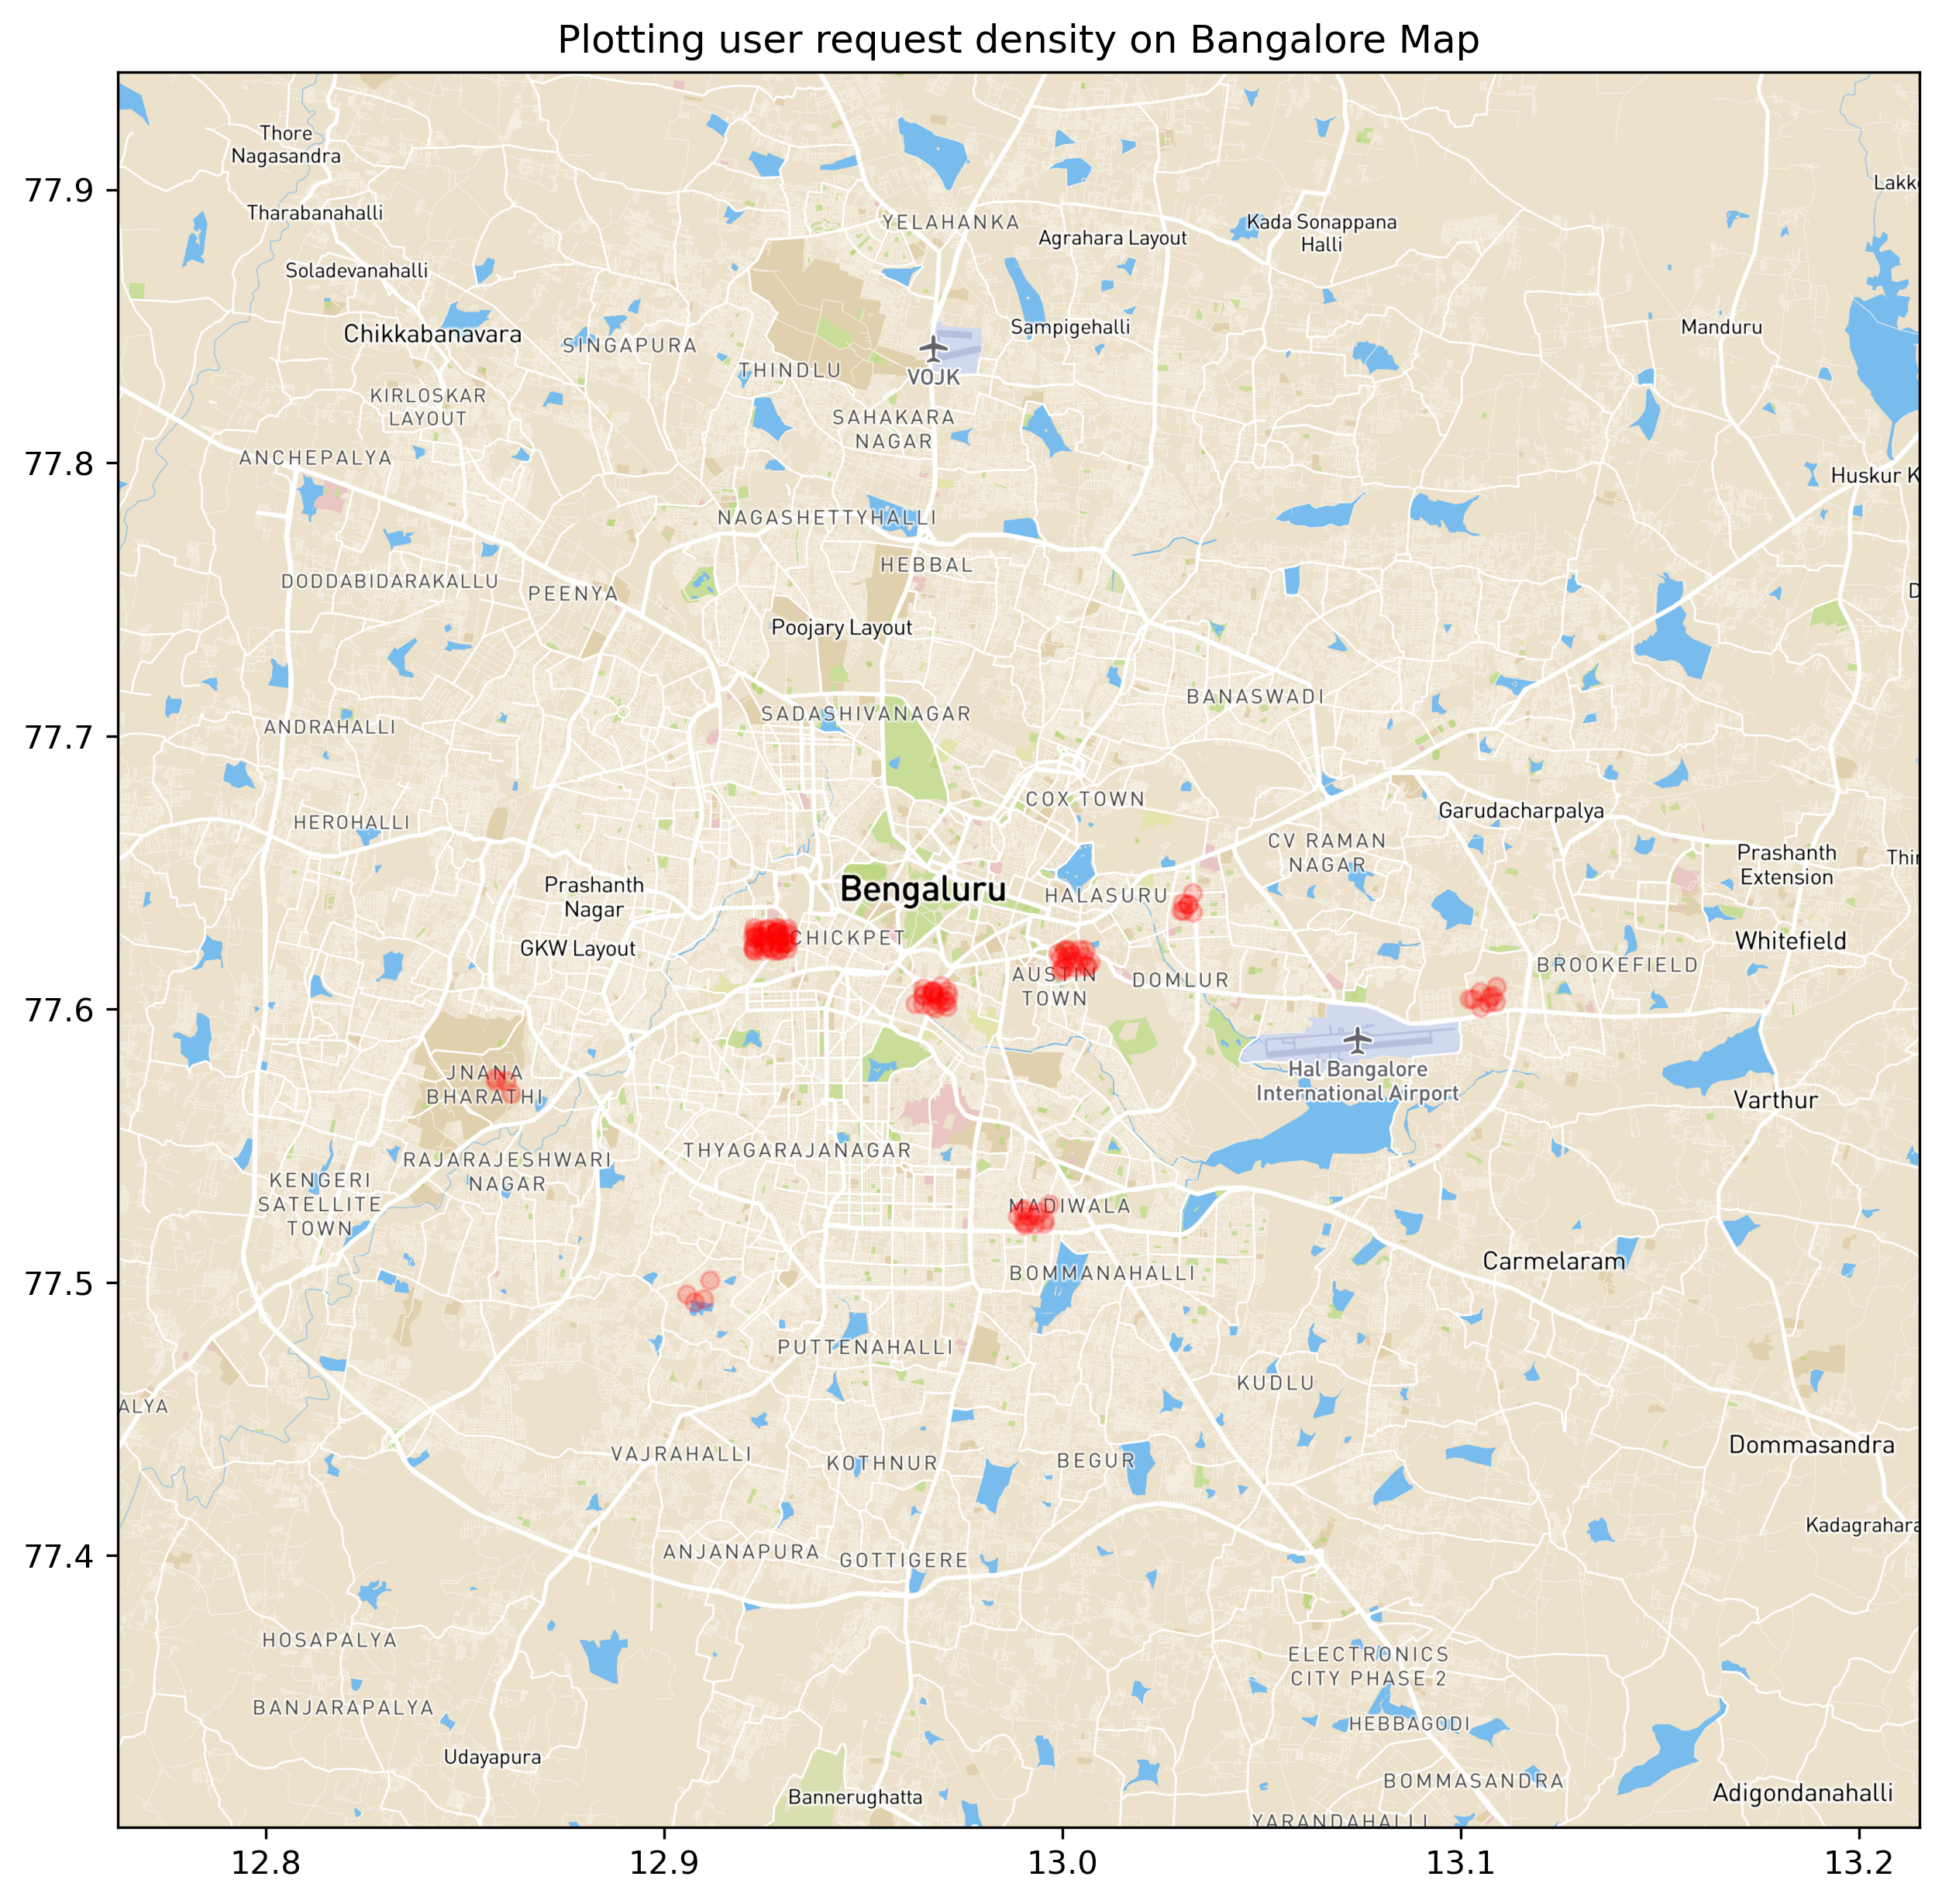

In [62]:
db = Database()

blr_map_box = (12.7629, 13.2152,77.3005, 77.9432)

curr_date = '2021-09-01T00:00:00.000'
end_date = '2021-09-30T00:00:00.000'

data = db.get_all_data('rides', {'start_time': {'$gte': "2021-09-01T00:00:00.000", '$lt': "2021-09-02T00:00:00.000"}},
                       {'_id': 0, 'start_time': 1, 'start_loc': 1})
locs = list(data)
df = pd.DataFrame(locs)

sf = df['start_loc'].apply(pd.Series)
sf[['x-axis','y-axis']] = pd.DataFrame(sf.coordinates.tolist())
sf.head()
df = df.merge(sf,left_index=True, right_index=True)

x = df['x-axis']
y = df['y-axis']

img = plt.imread('map2.png')
fig, axes = plt.subplots(figsize=(10, 10), dpi=300)

axes.scatter(x, y, zorder=1, alpha=0.2, c='red', s=30)
axes.title.set_text('Plotting user request density on Bangalore Map')
axes.set_xlim([blr_map_box[0], blr_map_box[1]])
axes.set_ylim([blr_map_box[2], blr_map_box[3]])
axes.imshow(img, zorder=0, extent=blr_map_box, aspect='auto')
